In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Read data
path='data1.csv'
df=pd.read_csv(path)
df.head()
df.tail()

,Year,Rank,Name,Point,City,Country
5245,2022,346,National Cheng Kung University (NCKU),60.7,Tainan City,Taiwan
5246,2022,346,University of New Mexico,60.7,Albuquerque,United States
5247,2022,348,Universitas Indonesia,60.6,Depok,Indonesia
5248,2022,349,Aga Khan University,60.5,Karachi,Pakistan
5249,2022,349,Northeastern University,60.5,Boston,United States


In [4]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     5250 non-null   int64  
 1   Rank     5250 non-null   int64  
 2   Name     5250 non-null   object 
 3   Point    5030 non-null   float64
 4   City     5250 non-null   object 
 5   Country  5249 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 246.2+ KB


In [ ]:
#remove Na
df=df.dropna()
df.isnull().sum()

In [5]:
#compute value counts
df['City'].value_counts()

London            102
-                  97
New York City      83
Seoul              60
Tokyo              50
                 ... 
Brno                1
Belfast             1
Burwood             1
Gif-sur-Yvette      1
Lille               1
Name: City, Length: 326, dtype: int64

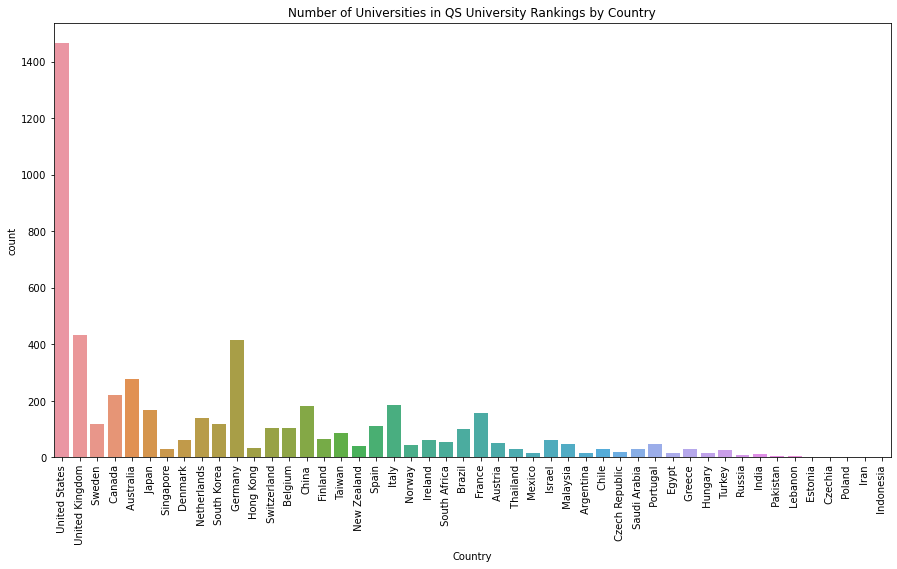

In [6]:
#distribution of Universities by country


plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Country')
plt.title('Number of Universities in QS University Rankings by Country')
plt.xticks(rotation=90)
plt.show()

In [8]:
#segregate the rankings year wise
df2018=df[df['Year']==2018]
df2019=df[df['Year']==2019]
df2020=df[df['Year']==2020]
df2021=df[df['Year']==2021]
df2022=df[df['Year']==2022]
    

In [9]:
#print the top 5 Universities 
df2022.head()

,Year,Rank,Name,Point,City,Country
3500,2022,1,Harvard University,97.7,Cambridge,United States
3501,2022,2,University of Cambridge,94.6,Cambridge,United Kingdom
3502,2022,2,University of Oxford,94.6,Oxford,United Kingdom
3503,2022,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
3504,2022,5,Johns Hopkins University,92.1,Baltimore,United States


In [10]:
# last 5 raked universities
df2022.tail()

,Year,Rank,Name,Point,City,Country
5245,2022,346,National Cheng Kung University (NCKU),60.7,Tainan City,Taiwan
5246,2022,346,University of New Mexico,60.7,Albuquerque,United States
5247,2022,348,Universitas Indonesia,60.6,Depok,Indonesia
5248,2022,349,Aga Khan University,60.5,Karachi,Pakistan
5249,2022,349,Northeastern University,60.5,Boston,United States


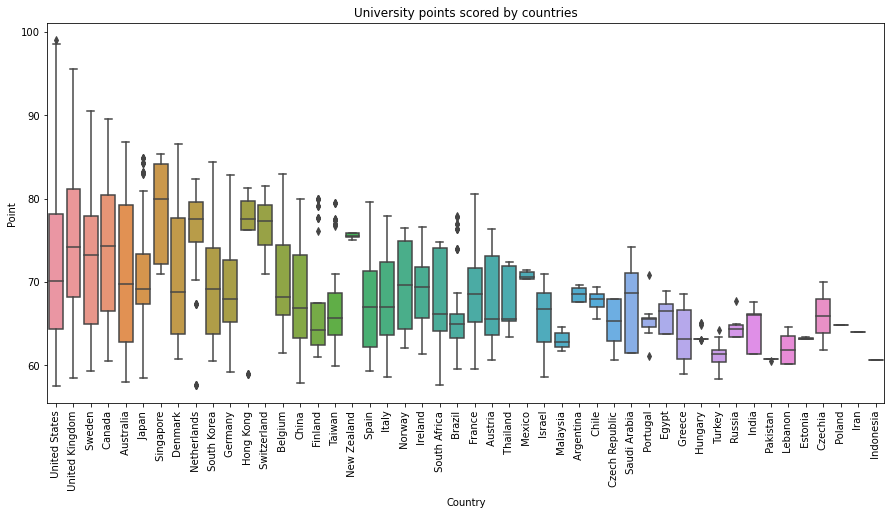

In [11]:
#plot the points scored by Universities from different countries
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Country',y='Point')
plt.xticks(rotation=90)
plt.title('University points scored by countries')
plt.show()

In [ ]:
dfs=[df2018,df2019,df2020,df2021,df2022]
year=2018
for df in dfs:
    plt.figure(figsize=(15,7))
    df['Country'].value_counts().plot.bar(color='red')
    text=str(year)
    plt.title('Number of Universities in QS World University Rankings by Country for the year '+text)
    year=year+1
    plt.show()

In [ ]:
#create individual data frames of count of number of universities per year
dfs=[df2018,df2019,df2020,df2021,df2022]
year=2018
counts=[]
for df in dfs:
    
    counts.append(pd.DataFrame(df['Country'].value_counts()))

In [ ]:
#Add years as the column headings
year=2018
for i in counts:
    col=str(year)
    i.columns=[col]
    year=year+1
counts

In [ ]:
#make a total data frame of all years counts (keeping only countries that were there in 2018 ranking list)
counts[0]['2019']=counts[1]['2019']
counts[0]['2020']=counts[2]['2020']
counts[0]['2021']=counts[3]['2021']
counts[0]['2022']=counts[4]['2022']

fin_count=counts[0]
fin_count

In [ ]:
fin_count.info()

In [ ]:
#plot showing the growth of number of Universities in the QS rankings
plt.figure(figsize=(25,12))
fin_count.plot(kind='bar',figsize=(20,10))
plt.show()

In [ ]:
#compute percentage change in number of Universities from 2018 to 2022
fin_count['per_ch']=(fin_count['2022']-fin_count['2018'])/fin_count['2018']*100
fin_count

In [ ]:
#plot percentage of increase in number of universities from 2018 to 2022
plt.figure(figsize=(20,12))
sns.barplot(data=fin_count,x=fin_count.index,y='per_ch')
plt.title('Percentage increase in number of Universities in QS word University Rankings from 2018 to 2022')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#compute contribution of each country to the QS world University rankings for years
fin_count['2018_prop']=fin_count['2018']/(fin_count['2018'].sum())*100
fin_count['2019_prop']=fin_count['2019']/(fin_count['2019'].sum())*100
fin_count['2020_prop']=fin_count['2020']/(fin_count['2020'].sum())*100
fin_count['2021_prop']=fin_count['2021']/(fin_count['2021'].sum())*100
fin_count['2022_prop']=fin_count['2022']/(fin_count['2022'].sum())*100
fin_count

In [ ]:
#plot the contribution of each country to the Rankings
prop_cols=['2018_prop','2019_prop','2020_prop','2021_prop','2022_prop']
year=2018
for col in prop_cols:
    
    text=str(year)
    plt.figure(figsize=(15,7))
    plt.pie(x=fin_count[col],labels=fin_count.index,autopct='%.1f%%',rotatelabels=True)
    plt.title('Contribution of countries to the QS world University rankings for '+text)
    year=year+1
    plt.show()

# **The US, Germany and the UK constantly ranked in the first three places in University rankings**

Thanks for your time!